# Robust zonal wind response

This script generates figure 1: maps of zonal wind response during DJF for
- coupled CMIP5 models (RCP8.5)
- atmosphere CMIP5 models (amipFuture and amip4K)
- ICON, MPI-ESM and IPSL-CM5A.

Note: for ICON, we investigate simulations with locked clouds and interactive water vapor. For MPI-ESM and IPSL-CM5A, we investigate simulations with both locked clouds and locked water vapor.

### Load libraries

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import netCDF4 as nc
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

import helper_functions as fct

### Load own colorbar

In [2]:
mymap, mymap2 = fct.generate_mymap()

### Specify months and seasons of the year

In [3]:
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
          'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
seasons = ['DJF', 'MAM', 'JJA', 'SON']

### Specify CMIP5 models and simulations that are analyzed

In [4]:
# models
models_amip = ['bcc-csm1-1', 'CanAM4', 'CCSM4', 'CNRM-CM5', 'HadGEM2-A',
               'IPSL-CM5A-LR', 'IPSL-CM5B-LR', 'MIROC5', 'MPI-ESM-LR',
               'MPI-ESM-MR', 'MRI-CGCM3']
models_cmip = ['ACCESS1-0', 'ACCESS1-3', 'bcc-csm1-1-m', 'bcc-csm1-1',
               'BNU-ESM', 'CanESM2', 'CCSM4', 'CESM1-BGC',
               'CESM1-CAM5', 'CMCC-CESM', 'CMCC-CM', 'CMCC-CMS',
               'CNRM-CM5', 'CSIRO-Mk3-6-0', 'EC-EARTH', 'FGOALS-g2',
               'FIO-ESM', 'GFDL-CM3', 'GFDL-ESM2G', 'GFDL-ESM2M',
               'GISS-E2-H', 'GISS-E2-R', 'HadGEM2-AO', 'HadGEM2-CC',
               'HadGEM2-ES', 'inmcm4', 'IPSL-CM5A-LR', 'IPSL-CM5A-MR',
               'IPSL-CM5B-LR', 'MIROC5', 'MIROC-ESM-CHEM', 'MIROC-ESM',
               'MPI-ESM-LR', 'MPI-ESM-MR', 'MRI-CGCM3', 'NorESM1-ME',
               'NorESM1-M']

# simulations
sims_cmip = ['historical', 'rcp85']
sims_amip = ['amip', 'amip4K', 'amipFuture']

### Read data (ICON, MPI-ESM, IPSL-CM5A)

The zonal wind fields were extracted from the data in the archive with Climate Data Operators (cdo; https://www.mpimet.mpg.de/cdo):

cdo selvar,u file.nc file.uwind.nc

In [5]:
# ICON simulations with locked clouds and interactive water vapor
runs_cld = ['T1C1', 'T2C2']
ipath = '../../ICON-NWP_lockedclouds/'
u850_icon = {}
for run in runs_cld:
    print('reading ' + run)
    ifile = 'ICON-NWP_AMIP_' + run + '_3d_mm.nc'
    u850_icon[run], lats, lons = fct.read_var_onelevel(ipath + ifile,
                                                       'u', 'lev', 850)
    del ifile
del run, ipath

##############################################################################
# MPI-ESM and IPSL-CM5A simulations with locked clouds and locked water vapor
runs_cldvap = ['T1C1W1', 'T2C2W2']
u850_mpi = {}; u850_ipsl = {}
for run in runs_cldvap:
    print('reading ' + run)
    # MPI-ESM
    #print('   MPI-ESM')
    ifile = 'MPI-ESM_' + run + '_3d_mm.uwind.nc'
    u850_mpi[run], lats_mpi, lons_mpi = fct.read_var_onelevel('../../MPI-ESM/' + ifile,
                                                              'u', 'plev', 850)
    del ifile
    
    # IPSL-CM5A
    #print('   IPSL-CM5A')
    ifile = 'IPSL-CM5A_' + run + '_3d_mm.remapcon.uwind.nc'
    u850_ipsl[run], lats_ipsl, lons_ipsl = fct.read_var_onelevel('../../IPSL-CM5A/' + ifile,
                                                                 'vitu', 'presnivs', 850)
    del ifile
del run

reading T1C1
reading T2C2
reading T1C1W1
reading T2C2W2


### Read data (CMIP5 models)

Note: All simulations were interpolated to the same grid and stored in numpy arrays with the jupyter notebook "interpolate_cmip5_data_to_common_grid.ipynb".

In [6]:
ipath = '../../cmip5/'
ntime = 360 # length of cmip/amip simulations in months (30 years)

# coupled models: historical and RCP8.5 simulations
# create arrays with dimensions (ntime, number of models, lats, lons)
u850_hist = np.full((ntime, len(models_cmip), len(lats), len(lons)),
                    np.nan, dtype=float)
u850_rcp85 = np.full((ntime, len(models_cmip), len(lats), len(lons)),
                     np.nan, dtype=float)
for m, model in enumerate(models_cmip):
    u850_hist[:, m, :, :] = np.load(ipath + model + '_u850_historical.npy')
    u850_rcp85[:, m, :, :] = np.load(ipath + model + '_u850_rcp85.npy')
del m, model

# atmosphere models: amip, amip4K and amipFuture simulations
# create arrays with dimensions (ntime, number of models, lats, lons)
u850_amip = np.full((ntime, len(models_amip), len(lats), len(lons)),
                    np.nan, dtype=float)
u850_amip4k = np.full((ntime, len(models_amip), len(lats), len(lons)),
                      np.nan, dtype=float)
u850_amipfut = np.full((ntime, len(models_amip), len(lats), len(lons)),
                       np.nan, dtype=float)
for m, model in enumerate(models_amip):
    u850_amip[:, m, :, :] = np.load(ipath + model + '_u850_amip.npy')
    u850_amip4k[:, m, :, :] = np.load(ipath + model + '_u850_amip4k.npy')
    u850_amipfut[:, m, :, :] = np.load(ipath + model + '_u850_amipfut.npy')
del m, model
del ipath

### Calculate DJF mean for all simulations

In [7]:
# ICON
u850_icon_djf = {}
for run in runs_cld:
    u850_icon_djf[run] = fct.calcMonthlyandSeasonMean(u850_icon[run],
                                                      months, seasons)[1]['DJF']
del run

# MPI-ESM and IPSL-CM5A
u850_mpi_djf = {}; u850_ipsl_djf = {}
for run in runs_cldvap:
    u850_mpi_djf[run] = fct.calcMonthlyandSeasonMean(u850_mpi[run],
                                                     months, seasons)[1]['DJF']
    u850_ipsl_djf[run] = fct.calcMonthlyandSeasonMean(u850_ipsl[run],
                                                      months, seasons)[1]['DJF']
del run

# coupled CMIP5 models
u850_cmip_djf = np.full((len(sims_cmip), len(models_cmip), len(lats),
                         len(lons)), np.nan, dtype=float)
u850_cmip_djf[0, :, :, :] = fct.calcMonthlyandSeasonMean(u850_hist, months,
                                                         seasons)[1]['DJF']
u850_cmip_djf[1, :, :, :] = fct.calcMonthlyandSeasonMean(u850_rcp85, months,
                                                         seasons)[1]['DJF']

# atmosphere CMIP5 models
u850_amip_djf = np.full((len(sims_amip), len(models_amip), len(lats),
                         len(lons)), np.nan, dtype=float)
u850_amip_djf[0, :, :, :] = fct.calcMonthlyandSeasonMean(u850_amip, months,
                                                         seasons)[1]['DJF']
u850_amip_djf[1, :, :, :] = fct.calcMonthlyandSeasonMean(u850_amip4k, months,
                                                         seasons)[1]['DJF']
u850_amip_djf[2, :, :, :] = fct.calcMonthlyandSeasonMean(u850_amipfut, months,
                                                         seasons)[1]['DJF']

# model mean for historical and amip simulations
u850_cmip_djf_mm = np.nanmean(u850_cmip_djf, axis=1)
u850_amip_djf_mm = np.nanmean(u850_amip_djf, axis=1)

# delete variables with time information
del u850_icon, u850_mpi, u850_ipsl
del u850_hist, u850_rcp85, u850_amip, u850_amip4k, u850_amipfut

/mnt/lustre02/work/bb1018/b380490/outputdata/ERL2021_data/pythonscripts/helper_functions.py:64: RuntimeWarning: Mean of empty slice
  monthly_mean[month] = np.nanmean(monthly_data[month], axis=0)
/mnt/lustre02/work/bb1018/b380490/outputdata/ERL2021_data/pythonscripts/helper_functions.py:71: RuntimeWarning: Mean of empty slice
  seasons_dict[season] ], axis=0)


### Calculate DJF responses

In [8]:
# ICON
du850_icon = u850_icon_djf['T2C2'] - u850_icon_djf['T1C1']
# MPI-ESM
du850_mpi = u850_mpi_djf['T2C2W2'] - u850_mpi_djf['T1C1W1']
# IPSL-CM5A
du850_ipsl = u850_ipsl_djf['T2C2W2'] - u850_ipsl_djf['T1C1W1']

# CMIP5
du850_rcp85 = u850_cmip_djf[1, :, :, :] - u850_cmip_djf[0, :, :, :]
du850_amip4k = u850_amip_djf[1, :, :, :] - u850_amip_djf[0, :, :, :]
du850_amipfut = u850_amip_djf[2, :, :, :] - u850_amip_djf[0, :, :, :]

# model mean
du850_rcp85_mm = np.nanmean(du850_rcp85, axis=0)
du850_amip4k_mm = np.nanmean(du850_amip4k, axis=0)
du850_amipfut_mm = np.nanmean(du850_amipfut, axis=0)

### Determine where responses are robust (CMIP simulations) and where ICON, MPI-ESM and IPSL-CM5A disagree with the robust amip4K response

In [9]:
# find indices, where 9 or more AMIP models agree on response
# 9 or more models should agree on the sign: set threshold to 7 (9-2)
# (because we sum over all models and positive and negative signs might cancel
#  each other out)
# 9 models agree on sign: sum = 7 or sum = -7
mask_thd = 7
mask_model_amip4k = np.sign(du850_amip4k)
mask_model_amipfut = np.sign(du850_amipfut)

# calculate sum over mask_model arrays along axis of models
# -> how many models agree on the sign
mask_sum_amip4k = np.nansum(mask_model_amip4k, axis=0)
mask_sum_amipfut = np.nansum(mask_model_amipfut, axis=0)

# apply threshold to mask_sum arrays
mask_u850_amip4k = np.logical_or(mask_sum_amip4k >= mask_thd,
                                 mask_sum_amip4k <= -1*mask_thd) * 1
mask_u850_amipfut = np.logical_or(mask_sum_amipfut >= mask_thd,
                                  mask_sum_amipfut <= -1*mask_thd) * 1

del mask_model_amip4k, mask_model_amipfut
del mask_sum_amip4k, mask_sum_amipfut
del mask_thd

##############################################################################
# find indices, where 30 or more coupled CMIP5 models agree on response
# 30 or more models should agree on the sign: set threshold to 23 (30-7)
# (37 models in total)
# (because we sum over all models and positive and negative signs might cancel
#  each other out)
# 30 models agree on sign: sum = 23 or sum = -23
mask_thd = 23
mask_model_rcp85 = np.sign(du850_rcp85)

# calculate sum over mask_model arrays along axis of models
# -> how many models agree on the sign
mask_sum_rcp85 = np.nansum(mask_model_rcp85, axis=0)

# apply threshold to mask_sum arrays
mask_u850_rcp85 = np.logical_or(mask_sum_rcp85 >= mask_thd,
                                mask_sum_rcp85 <= -1*mask_thd) * 1

del mask_model_rcp85, mask_sum_rcp85, mask_thd

##############################################################################
# find indices, where sign of robust response in amip4K simulations does not
# agree with ICON, MPI-ESM and IPSL-CM5A
mask_model_icon = np.full((len(models_amip), len(lats), len(lons)),
                          np.nan, dtype=float)
mask_model_mpi = np.full((len(models_amip), len(lats), len(lons)),
                         np.nan, dtype=float)
mask_model_ipsl = np.full((len(models_amip), len(lats), len(lons)),
                          np.nan, dtype=float)

for m in range(len(models_amip)):
    mask_model_icon[m, :, :] = \
      np.logical_or(np.logical_and(du850_icon * mask_u850_amip4k > 0,
                                   du850_amip4k[m, :, :] * mask_u850_amip4k < 0),
                    np.logical_and(du850_icon * mask_u850_amip4k < 0,
                                   du850_amip4k[m, :, :] * mask_u850_amip4k > 0)) * 1
    mask_model_mpi[m, :, :] = \
      np.logical_or(np.logical_and(du850_mpi * mask_u850_amip4k > 0,
                                   du850_amip4k[m, :, :] * mask_u850_amip4k < 0),
                    np.logical_and(du850_mpi * mask_u850_amip4k < 0,
                                   du850_amip4k[m, :, :] * mask_u850_amip4k > 0)) * 1
    mask_model_ipsl[m, :, :] = \
      np.logical_or(np.logical_and(du850_ipsl * mask_u850_amip4k > 0,
                                   du850_amip4k[m, :, :] * mask_u850_amip4k < 0),
                    np.logical_and(du850_ipsl * mask_u850_amip4k < 0,
                                   du850_amip4k[m, :, :] * mask_u850_amip4k > 0)) * 1
del m

mask_thd = 9 # icon should agree with 9 or more models
mask_u850_icon_na = (np.nansum(mask_model_icon, axis=0) >= mask_thd) * 1
mask_u850_mpi_na = (np.nansum(mask_model_mpi, axis=0) >= mask_thd) * 1
mask_u850_ipsl_na = (np.nansum(mask_model_ipsl, axis=0) >= mask_thd) * 1

del mask_model_icon, mask_model_mpi, mask_model_ipsl
del mask_thd

/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:58: RuntimeWarning: invalid value encountered in less
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:60: RuntimeWarning: invalid value encountered in greater
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:63: RuntimeWarning: invalid value encountered in less
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:65: RuntimeWarning: invalid value encountered in greater
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:68: RuntimeWarning: invalid value encountered in less
/sw/rhel6-x64/conda/anaconda3-bleeding_edge/lib/python3.6/site-packages/ipykernel_launcher.py:70: RuntimeWarning: invalid value encountered in greater


### Calculate jet latitude in model-mean historical, model-mean amip, ICON, MPI-ESM, and IPSL-CM5A control simulations for the Northern Hemisphere

In [10]:
# latitudes in Northern Hemisphere
latind0 = (np.abs(lats-0)).argmin() + 1
lats_NH = lats[latind0:]

# shift longitudes from 0deg...360deg to -270deg...90deg for visualization reasons
# and look at NH
u850_cmip_mm_shift, lons_shift = fct.shiftgrid_copy(90.,
                                                    u850_cmip_djf_mm[0, latind0:, :],
                                                    lons, start=False)
u850_amip_mm_shift, _ = fct.shiftgrid_copy(90.,
                                           u850_amip_djf_mm[0, latind0:, :],
                                           lons, start=False)
u850_icon_shift, _ = fct.shiftgrid_copy(90.,
                                        u850_icon_djf['T1C1'][latind0:, :],
                                        lons, start=False)
u850_mpi_shift, _ = fct.shiftgrid_copy(90.,
                                       u850_mpi_djf['T1C1W1'][latind0:, :],
                                       lons, start=False)
u850_ipsl_shift, _ = fct.shiftgrid_copy(90.,
                                        u850_ipsl_djf['T1C1W1'][latind0:, :],
                                        lons, start=False)

jetlat_hist_mm_nh = np.full(lons_shift.size, np.nan, dtype=float)
jetlat_amip_mm_nh = np.full(lons_shift.size, np.nan, dtype=float)
jetlat_icon_nh = np.full(lons_shift.size, np.nan, dtype=float)
jetlat_mpi_nh = np.full(lons_shift.size, np.nan, dtype=float)
jetlat_ipsl_nh = np.full(lons_shift.size, np.nan, dtype=float)
for lo in range(lons_shift.size):
    # historical simulation
    jetlat_hist_mm_nh[lo], _ = \
       fct.get_eddyjetlatint_NH_nan(u850_cmip_mm_shift[:, lo],
                                     lats_NH, lons_shift[lo])
    # amip simulation
    jetlat_amip_mm_nh[lo], _ = \
       fct.get_eddyjetlatint_NH_nan(u850_amip_mm_shift[:, lo],
                                    lats_NH, lons_shift[lo])
    # ICON
    jetlat_icon_nh[lo], _ = \
       fct.get_eddyjetlatint_NH(u850_icon_shift[:, lo], lats_NH)
    # MPI-ESM
    jetlat_mpi_nh[lo], _ = \
       fct.get_eddyjetlatint_NH(u850_mpi_shift[:, lo], lats_NH)
    # IPSL-CM5A
    jetlat_ipsl_nh[lo], _ = \
       fct.get_eddyjetlatint_NH_nan(u850_ipsl_shift[:, lo],
                                    lats_NH, lons_shift[lo])
del lo

del u850_cmip_mm_shift, u850_amip_mm_shift, \
    u850_icon_shift, u850_mpi_shift, u850_ipsl_shift
del lons_shift

### Prepare plot of u850 response

Shift the longitudes from 0deg...360deg to -90deg...270deg for visualization reasons and select the North Atlantic region (otherwise it is very slow to add the dots for the regions, in which the response is significant in the CMIP5 models, and the hatching for the regions, in which the response in ICON, MPI-ESM and IPSL-CM5A does not agree with the robust amip4K response).

In [11]:
# shift longitudes
lons_plot = fct.shiftgrid_copy(90., du850_icon, lons, start=False)[1]

# North Atlantic region
lonind_west = (np.abs(lons_plot--90)).argmin() # find index of 90°W
lonind_east = (np.abs(lons_plot-35)).argmin()  # find index of 35°E
latind_sout = (np.abs(lats-20)).argmin()       # find index of 20°N
latind_nort = (np.abs(lats-80)).argmin()       # find index of 80°N

lons_plot = lons_plot[lonind_west:lonind_east+1]
lats_plot = lats[latind_sout:latind_nort+1]

# MPI-ESM uses slightly different latitudes
latind_sout_mpi = (np.abs(lats_mpi-20)).argmin() # find index of 20°N
latind_nort_mpi = (np.abs(lats_mpi-80)).argmin() # find index of 80°N
lats_mpi_plot = lats_mpi[latind_sout_mpi:latind_nort_mpi+1]

# shift zonal wind fields and masks
du850_rcp85_plot = fct.shiftgrid_copy(90., du850_rcp85_mm, lons,
                                      start=False)[0][latind_sout:latind_nort+1,
                                                      lonind_west:lonind_east+1]
mask_rcp85_plot = fct.shiftgrid_copy(90., mask_u850_rcp85, lons,
                                     start=False)[0][latind_sout:latind_nort+1,
                                                     lonind_west:lonind_east+1]
du850_amipfut_plot = fct.shiftgrid_copy(90., du850_amipfut_mm, lons,
                                        start=False)[0][latind_sout:latind_nort+1,
                                                        lonind_west:lonind_east+1]
mask_amipfut_plot = fct.shiftgrid_copy(90., mask_u850_amipfut, lons,
                                       start=False)[0][latind_sout:latind_nort+1,
                                                       lonind_west:lonind_east+1]
du850_amip4k_plot = fct.shiftgrid_copy(90., du850_amip4k_mm, lons,
                                       start=False)[0][latind_sout:latind_nort+1,
                                                       lonind_west:lonind_east+1]
mask_amip4k_plot = fct.shiftgrid_copy(90., mask_u850_amip4k, lons,
                                      start=False)[0][latind_sout:latind_nort+1,
                                                      lonind_west:lonind_east+1]

du850_icon_plot = fct.shiftgrid_copy(90., du850_icon, lons,
                                     start=False)[0][latind_sout:latind_nort+1,
                                                     lonind_west:lonind_east+1]
mask_icon_plot = fct.shiftgrid_copy(90., mask_u850_icon_na, lons,
                                    start=False)[0][latind_sout:latind_nort+1,
                                                    lonind_west:lonind_east+1]

du850_mpi_plot = fct.shiftgrid_copy(90., du850_mpi, lons,
                                    start=False)[0][latind_sout_mpi:latind_nort_mpi+1,
                                                    lonind_west:lonind_east+1]
mask_mpi_plot = fct.shiftgrid_copy(90., mask_u850_mpi_na, lons,
                                   start=False)[0][latind_sout_mpi:latind_nort_mpi+1,
                                                   lonind_west:lonind_east+1]

du850_ipsl_plot = fct.shiftgrid_copy(90., du850_ipsl, lons,
                                    start=False)[0][latind_sout:latind_nort+1,
                                                    lonind_west:lonind_east+1]
mask_ipsl_plot = fct.shiftgrid_copy(90., mask_u850_ipsl_na, lons,
                                   start=False)[0][latind_sout:latind_nort+1,
                                                   lonind_west:lonind_east+1]

### Plot maps of u850 response in DJF for RCP8.5, amipFuture, amip4K, ICON, MPI-ESM and IPSL-CM5A

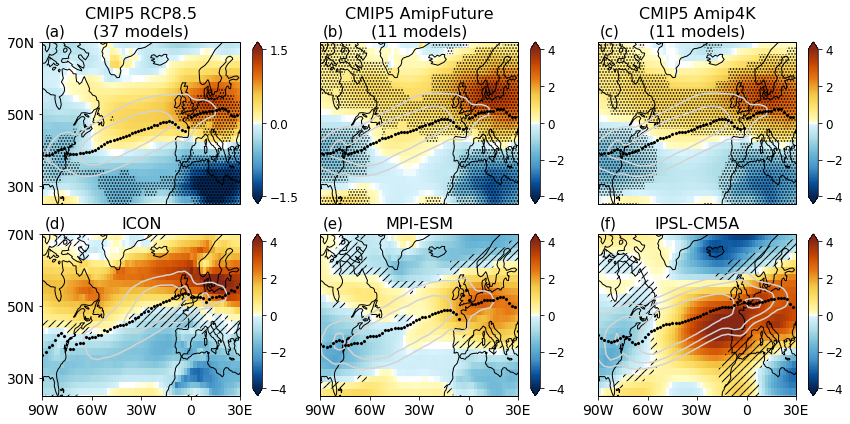

In [12]:
proj = ccrs.PlateCarree(central_longitude=-90)
fig, ax = plt.subplots(2, 3, figsize=(12, 6),#figsize(10),
                       subplot_kw=dict(projection=proj))
ax = ax.reshape(-1)
for i in range(ax.shape[0]):
    ax[i].coastlines(rasterized=True)
    ax[i].set_aspect('auto')
    ax[i].tick_params(labelsize=14)  
    # extended North Atlantic region
    ax[i].set_extent([-90, 30, 25, 70], ccrs.PlateCarree())
    # set xticks and yticks for latitudes and longitudes
    # xaxis: longitudes
    if i > 2: # last row
        #ax[i].set_xticks([0, 90, 180, 270], crs=ccrs.PlateCarree())
        ax[i].set_xticks([-90, -60, -30, 0, 30], crs=ccrs.PlateCarree())
        lon_formatter = LongitudeFormatter(#zero_direction_label=True,
                                            degree_symbol='',
                                            dateline_direction_label=True)
        ax[i].xaxis.set_major_formatter(lon_formatter)
        del lon_formatter
    # yaxis: latitudes
    if i in [0, 3]:
        #ax[i].set_yticks([-90, -60, -30, 0, 30, 60, 90], crs=ccrs.PlateCarree())
        ax[i].set_yticks([30, 50, 70], crs=ccrs.PlateCarree())
        lat_formatter = LatitudeFormatter(degree_symbol='')
        ax[i].yaxis.set_major_formatter(lat_formatter)
        del lat_formatter
del i

# plot contour for 8, 10 and 12 m/s in CTL
levp = [8, 10, 12]
ax[0].contour(lons_plot, lats_plot,
              fct.shiftgrid_copy(90., u850_cmip_djf_mm[0,:,:], lons,
                                 start=False)[0][latind_sout:latind_nort+1,
                                                 lonind_west:lonind_east+1],
              levels=levp, colors='lightgrey', transform=ccrs.PlateCarree())
ax[1].contour(lons_plot, lats_plot,
              fct.shiftgrid_copy(90., u850_amip_djf_mm[0,:,:], lons,
                                 start=False)[0][latind_sout:latind_nort+1,
                                                 lonind_west:lonind_east+1],
              levels=levp, colors='lightgrey', transform=ccrs.PlateCarree())
ax[2].contour(lons_plot, lats_plot,
              fct.shiftgrid_copy(90., u850_amip_djf_mm[0,:,:], lons,
                                 start=False)[0][latind_sout:latind_nort+1,
                                                 lonind_west:lonind_east+1],
              levels=levp, colors='lightgrey', transform=ccrs.PlateCarree())
ax[3].contour(lons_plot, lats_plot,
              fct.shiftgrid_copy(90., u850_icon_djf['T1C1'], lons,
                                 start=False)[0][latind_sout:latind_nort+1,
                                                 lonind_west:lonind_east+1],
              levels=levp, colors='lightgrey', transform=ccrs.PlateCarree())
ax[4].contour(lons_plot, lats_mpi_plot,
              fct.shiftgrid_copy(90., u850_mpi_djf['T1C1W1'], lons,
                                 start=False)[0][latind_sout:latind_nort+1,
                                                 lonind_west:lonind_east+1],
              levels=levp, colors='lightgrey', transform=ccrs.PlateCarree())
ax[5].contour(lons_plot, lats_plot,
              fct.shiftgrid_copy(90., u850_ipsl_djf['T1C1W1'], lons,
                                 start=False)[0][latind_sout:latind_nort+1,
                                                 lonind_west:lonind_east+1],
              levels=levp, colors='lightgrey', transform=ccrs.PlateCarree())
del levp

# cmip5 coupled models
cf = ax[0].pcolormesh(lons_plot, lats_plot, du850_rcp85_plot,
                      vmin=-1.5, vmax=1.5, cmap=mymap2,
                      rasterized=True, transform=ccrs.PlateCarree())
# jet latitude in control run
ax[0].plot(lons_plot, jetlat_hist_mm_nh[lonind_west:lonind_east+1],
           marker='x', color='k', linestyle='none', markeredgewidth=2,
           markersize=2, transform=ccrs.PlateCarree())
# stippling, where models agree on response
ax[0].pcolor(lons_plot, lats_plot, np.ma.masked_values(mask_rcp85_plot, 0),
             hatch='....', alpha=0., rasterized=True,
             transform=ccrs.PlateCarree())
clevs = np.arange(-1.5, 2, 1.5)
cb = fig.colorbar(cf, ax=ax[0], aspect=15, extend='both', ticks=clevs)
cb.ax.tick_params(labelsize=12)
del clevs, cb, cf
ax[0].set_title('CMIP5 RCP8.5\n(37 models)', fontsize=16)
# amipfuture
cf = ax[1].pcolormesh(lons_plot, lats_plot, du850_amipfut_plot,
                      vmin=-4, vmax=4, cmap=mymap2,
                      rasterized=True, transform=ccrs.PlateCarree())
# jet latitude in control run
ax[1].plot(lons_plot, jetlat_amip_mm_nh[lonind_west:lonind_east+1],
           marker='x', color='k', linestyle='none', markeredgewidth=2,
           markersize=2, transform=ccrs.PlateCarree())
# stippling, where models agree on response
ax[1].pcolor(lons_plot, lats_plot, np.ma.masked_values(mask_amipfut_plot, 0),
             hatch='....', alpha=0., rasterized=True,
             transform=ccrs.PlateCarree())
clevs = np.arange(-4, 5, 2)
cb = fig.colorbar(cf, ax=ax[1], aspect=15, extend='both', ticks=clevs)
cb.ax.tick_params(labelsize=12)
del clevs, cb, cf
ax[1].set_title('CMIP5 AmipFuture\n(11 models)', fontsize=16)
# amip4k
cf = ax[2].pcolormesh(lons_plot, lats_plot, du850_amip4k_plot,
                      vmin=-4, vmax=4, cmap=mymap2,
                      rasterized=True, transform=ccrs.PlateCarree())
# jet latitude in control run
ax[2].plot(lons_plot, jetlat_amip_mm_nh[lonind_west:lonind_east+1],
           marker='x', color='k', linestyle='none', markeredgewidth=2,
           markersize=2, transform=ccrs.PlateCarree())
# stippling, where models agree on response
ax[2].pcolor(lons_plot, lats_plot, np.ma.masked_values(mask_amip4k_plot, 0),
             hatch='....', alpha=0., rasterized=True,
             transform=ccrs.PlateCarree())
clevs = np.arange(-4, 5, 2)
cb = fig.colorbar(cf, ax=ax[2], aspect=15, extend='both', ticks=clevs)
cb.ax.tick_params(labelsize=12)
del clevs, cb, cf
ax[2].set_title('CMIP5 Amip4K\n(11 models)', fontsize=16)
# ICON (locked clouds)
cf = ax[3].pcolormesh(lons_plot, lats_plot, du850_icon_plot,
                      vmin=-4, vmax=4, cmap=mymap2,
                      rasterized=True, transform=ccrs.PlateCarree())
# jet latitude in control run
ax[3].plot(lons_plot, jetlat_icon_nh[lonind_west:lonind_east+1],
           marker='x', color='k', linestyle='none', markeredgewidth=2,
           markersize=2, transform=ccrs.PlateCarree())
# hatching, where response does not agree with robust amip4K response
ax[3].pcolor(lons_plot, lats_plot,
             np.ma.masked_values(mask_icon_plot, 0),
             hatch='///', alpha=0., rasterized=True,
             transform=ccrs.PlateCarree())
clevs = np.arange(-4, 5, 2)
cb = fig.colorbar(cf, ax=ax[3], aspect=15, extend='both', ticks=clevs)
cb.ax.tick_params(labelsize=12)
del clevs, cb, cf
ax[3].set_title('ICON', fontsize=16)
# MPI-ESM
cf = ax[4].pcolormesh(lons_plot, lats_mpi_plot, du850_mpi_plot,
                      vmin=-4, vmax=4, cmap=mymap2,
                      rasterized=True, transform=ccrs.PlateCarree())
# jet latitude in control run
ax[4].plot(lons_plot, jetlat_mpi_nh[lonind_west:lonind_east+1],
           marker='x', color='k', linestyle='none', markeredgewidth=2,
           markersize=2, transform=ccrs.PlateCarree())
# hatching, where response does not agree with robust amip4K response
ax[4].pcolor(lons_plot, lats_mpi_plot,
             np.ma.masked_values(mask_mpi_plot, 0),
             hatch='///', alpha=0., rasterized=True,
             transform=ccrs.PlateCarree())
clevs = np.arange(-4, 5, 2)
cb = fig.colorbar(cf, ax=ax[4], aspect=15, extend='both', ticks=clevs)
cb.ax.tick_params(labelsize=12)
del clevs, cb, cf
ax[4].set_title('MPI-ESM', fontsize=16)
# IPSL-CM5A
cf = ax[5].pcolormesh(lons_plot, lats_plot, du850_ipsl_plot,
                      vmin=-4, vmax=4, cmap=mymap2,
                      rasterized=True, transform=ccrs.PlateCarree())
# jet latitude in control run
ax[5].plot(lons_plot, jetlat_ipsl_nh[lonind_west:lonind_east+1],
           marker='x', color='k', linestyle='none', markeredgewidth=2,
           markersize=2, transform=ccrs.PlateCarree())
# hatching, where response does not agree with robust amip4K response
ax[5].pcolor(lons_plot, lats_plot,
             np.ma.masked_values(mask_ipsl_plot, 0),
             hatch='///', alpha=0., rasterized=True,
             transform=ccrs.PlateCarree())
clevs = np.arange(-4, 5, 2)
cb = fig.colorbar(cf, ax=ax[5], aspect=15, extend='both', ticks=clevs)
cb.ax.tick_params(labelsize=12)
del clevs, cb, cf
ax[5].set_title('IPSL-CM5A', fontsize=16)

fig.canvas.draw()
fig.tight_layout()

# a), b) etc for subplots
labs = ['(a)', '(b)', '(c)', '(d)', '(e)', '(f)']
for i in range(ax.shape[0]):
    ax[i].text(0.01, 1.02, labs[i], va='bottom', ha='left',
               rotation_mode='anchor', fontsize=15,
               transform=ax[i].transAxes)
del i
    
fig.savefig('figure1a_1f.pdf', dpi=400, bbox_inches='tight')

plt.show(fig)
plt.close(fig)
del fig, ax, proj